# Universidade de Caxias do Sul
# Área de Ciências Exatas e Engenharias
# Aprendizado de Máquina II - Aprendizado Supervisionado
##  Profas. Renata de Paris e Carine G. Webber
##  Aluno Gabriel Orlandin Gomes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  

In [2]:
from google.colab import files
arquivo = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [22]:
# Carga do dataset
#zoo = pd.read_csv('/content/drive/My Drive/_Aprendiz_Máquina/zoo.csv')
cancer = pd.read_csv('breast-cancer.csv',',')
cancer.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Nova seção

In [23]:
# X deve armazenar as características e y o atributo target 

X = cancer.iloc[:, 2:-1].values  

y = cancer.iloc[:, 1].values  
print(X.shape)

(569, 29)


In [24]:
X

array([[ 17.99  ,  10.38  , 122.8   , ...,   0.7119,   0.2654,   0.4601],
       [ 20.57  ,  17.77  , 132.9   , ...,   0.2416,   0.186 ,   0.275 ],
       [ 19.69  ,  21.25  , 130.    , ...,   0.4504,   0.243 ,   0.3613],
       ...,
       [ 16.6   ,  28.08  , 108.3   , ...,   0.3403,   0.1418,   0.2218],
       [ 20.6   ,  29.33  , 140.1   , ...,   0.9387,   0.265 ,   0.4087],
       [  7.76  ,  24.54  ,  47.92  , ...,   0.    ,   0.    ,   0.2871]])

In [25]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [26]:
# cria os conjuntos de treino e de teste - 30% para teste de forma randômica
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(398, 29) (398,)
(171, 29) (171,)


In [27]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[['B' 'M']
 [255 143]]


In [28]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[['B' 'M']
 [102 69]]


# Execução do método kNN

In [29]:
neigh = KNeighborsClassifier(n_neighbors=3,weights='distance')
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [30]:
# Armazena as predições'
from sklearn.metrics import accuracy_score
predictions_train = neigh.predict(X_train)
#Calcula a acurácia
accuracy_score(y_train,predictions_train)*100

100.0

In [31]:
from sklearn.metrics import confusion_matrix
#Gera a matriz de confusão do treino
confusion_matrix(y_train,predictions_train)

array([[255,   0],
       [  0, 143]])

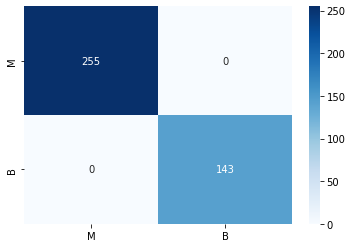

In [32]:
#Gera a matriz de confusão do treino na visualização de HeatMMap
cf = confusion_matrix(y_train,predictions_train)
lbl1=['M', 'B']
lbl2 = ['M', 'B']
sns.heatmap(cf,annot=True,cmap="Blues", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

In [33]:
#Calcula a acurácia
predictions = neigh.predict(X_test)
accuracy_score(y_test,predictions)*100

95.32163742690058

In [34]:
#Gera a matriz de confusão do conjunto de teste 
confusion_matrix(y_test,predictions)

array([[99,  3],
       [ 5, 64]])

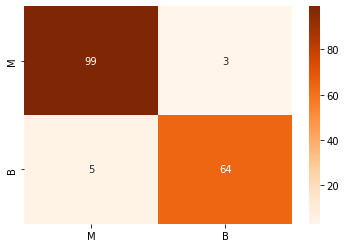

In [35]:
#Gera a matriz de confusão para o conunto de teste na visualização de HeatMMap
cf = confusion_matrix(y_test,predictions)
lbl1=['M', 'B']
lbl2 = ['M', 'B']
sns.heatmap(cf,annot=True,cmap="Oranges", fmt="d",xticklabels=lbl1,yticklabels=lbl2)